In [11]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [7]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')

In [8]:
# LeNet architecture
# 1x32x32 input --> (5x5) kernel, stride=1, padding=0 --> avg pool s=2,p=0 --> (5x5) kernel, stride=1, padding=0 --> avg pool s=2,p=0
# Convert 5x5 to 120 channels x Linear 84 x Linear 10

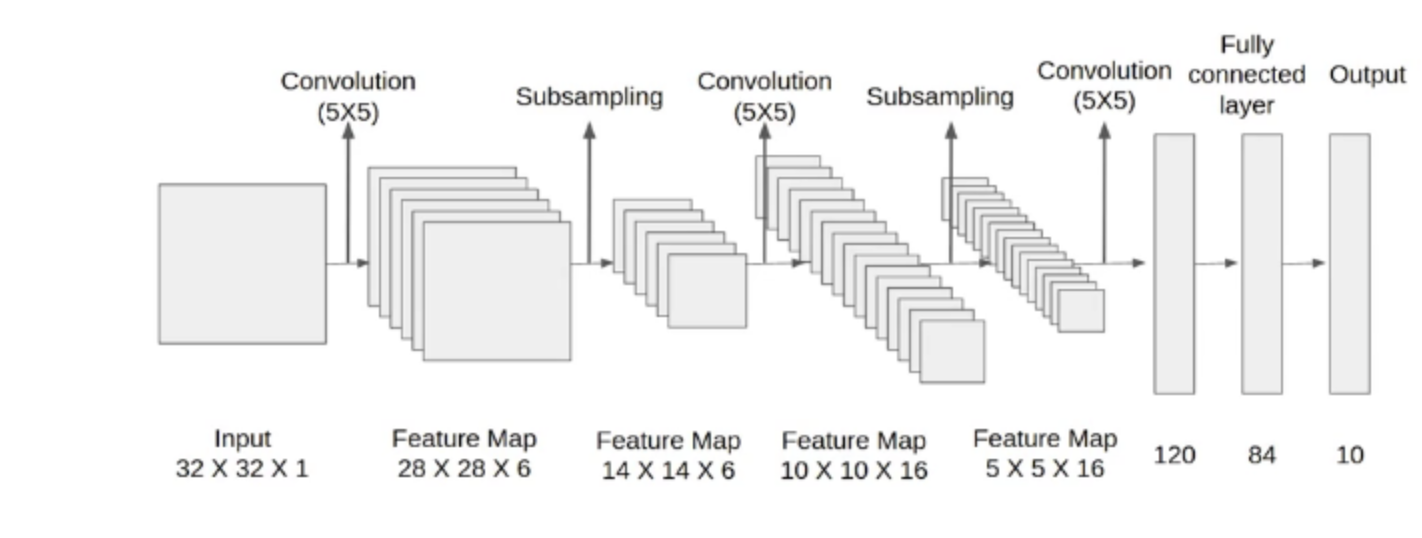

In [9]:
class LeNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.relu = nn.ReLU() # We're improvising here. We're using ReLU instead of tanh and sigmoid because it's better.
    self.pool = nn.AvgPool2d(kernel_size=(2,2), stride=(2,2))
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5,5), stride=(1,1), padding=(0,0))
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5), stride=(1,1), padding=(0,0))
    self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=(5,5), stride=(1,1), padding=(0,0))
    self.linear1 = nn.Linear(120, 84)
    self.linear2 = nn.Linear(84, 10)

  def forward(self, x):
    output = self.pool(self.relu(self.conv1(x)))
    output = self.pool(self.relu(self.conv2(output)))
    output = self.relu(self.conv3(output))  # num_examples * 128 channels * 1 * 1 --> num_examples * 120
    output = output.reshape(x.shape[0], -1)
    output = self.relu(self.linear1(output))
    output = self.linear2(output) # no activation function on the last layer.
    return output

Checking if our model has all the correct output size, given the input size we have.

In [17]:
x = torch.randn(64, 1, 32, 32)
model = LeNet()
y = model(x)
print(y.shape)

torch.Size([64, 10])
